# PF-MCMC Implementation with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy.integrate import odeint

In [98]:
def SUIRD_model(params, previous_state, N):
    alpha, beta, gamma, mu= params
    S, U, I, R, D = previous_state

    for i in range(t):
        dS = -(beta * S * U)/ N
        dU =  (beta * S * U)/ N - (alpha * U) - (gamma * U) - (mu * U)
        dI = alpha * U - (gamma * I) - (mu * I)
        dR = gamma * U + (gamma * I)
        dD = mu * U + (mu * I)
        
        S_n = S + dS
        U_n = U + dU
        I_n= I + dI
        R_n = R+  dR
        D_n = D + dD

    return [S_n, U_n, I_n, R_n, D_n]

In [341]:
# Initial state
N =  10000
U0 =  stats.uniform(500,1000).rvs(1)[0]     # Initial undetected infected population
S0 = N - U0   # Initial susceptible population
I0 = 0       # Initial infected population
R0 = 0      # Initial recovered population
D0 = 0      # Initial deceased population

states_0 = np.array([S0, U0, I0, R0, D0], dtype='float64')

param_means = [0.1, 0.3, 0.07, 0.01]
param_stds = [0.01, 0.02, 0.005, 0.005]

alpha = stats.truncnorm(0.01, 0.99, param_means[0], param_stds[0],).rvs()
beta = stats.truncnorm(0.01, 0.99, param_means[1], param_stds[1],).rvs()
gamma = stats.truncnorm(0.01, 0.99, param_means[2], param_stds[2],).rvs()
mu = stats.truncnorm(0.01, 0.99, param_means[3], param_stds[3],).rvs()

params_0 = np.array([alpha, beta, gamma, mu], dtype='float64')

T = 50

states_history = np.zeros((len(states_0),T))
params_history = np.zeros((len(params_0),T))

states_history[:,0] = states_0
params_history[:,0] = params_0

for t in range(1,T):
    S,U,I,R,D = SUIRD_model(params_history[:,t-1], states_history[:,t-1], N)
    states = np.array([S,U,I,R,D])
    # Sample parameters
    alpha = stats.norm(params_history[0, t-1], param_stds[0]).rvs()
    beta = stats.norm(params_history[1, t-1], param_stds[1]).rvs()
    gamma = stats.norm(params_history[2, t-1], param_stds[2]).rvs()
    mu = stats.norm(params_history[3, t-1], param_stds[3]).rvs()
    params = np.array([alpha, beta, gamma, mu])
    
    states_history[:,t] = states
    params_history[:,t] = params

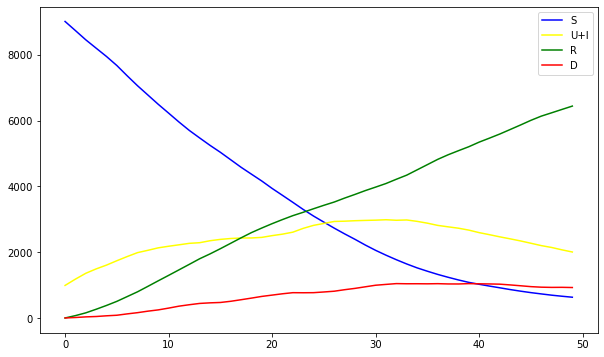

In [342]:
plt.figure(figsize=(10,6))
plt.plot(range(0,T), states_history[0,:], label='S', color='blue')
plt.plot(range(0,T), states_history[1,:]+states_history[2,:], label='U+I', color='yellow')
#plt.plot(range(0,T), states_history[2,:], label='I', color='orange')
plt.plot(range(0,T), states_history[3,:], label='R', color='green')
plt.plot(range(0,T), states_history[4,:], label='D', color='red')
plt.legend()
plt.show()

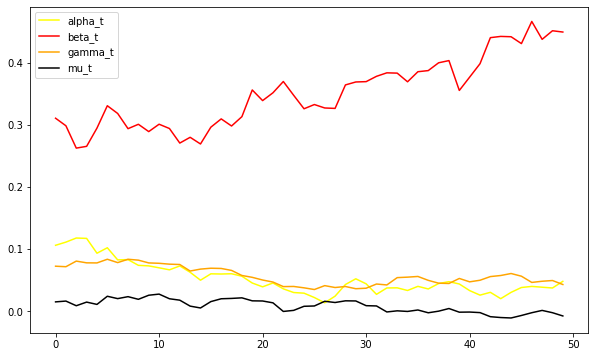

In [343]:
plt.figure(figsize=(10,6))
plt.plot(range(0,T), params_history[0,:], label='alpha_t', color='yellow')
plt.plot(range(0,T), params_history[1,:], label='beta_t', color='red')
plt.plot(range(0,T), params_history[2,:], label='gamma_t', color='orange')
plt.plot(range(0,T), params_history[3,:], label='mu_t', color='black')
plt.legend()
plt.show()